In [9]:
# load the dataset
import pandas as pd
import numpy as np
data = pd.read_csv('usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


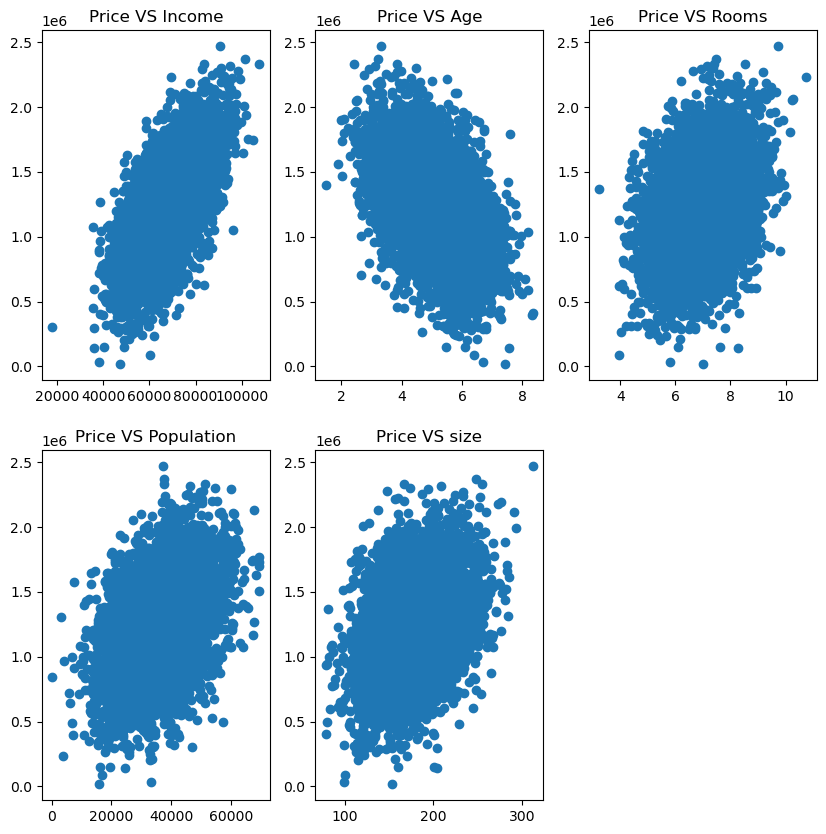

In [15]:
# matplotlib inline
from matplotlib import pyplot as plt

price = data.loc[:, 'Price']
income = data.loc[:, 'Avg. Area Income']
age = data.loc[:, 'Avg. Area House Age']
rooms = data.loc[:, 'Avg. Area Number of Rooms']
population = data.loc[:, 'Area Population']
size = data.loc[:, 'size']

fig = plt.figure(figsize=(10,10))

fig1 = plt.subplot(231)
plt.scatter(income, price)
plt.title('Price VS Income')

fig2 = plt.subplot(232)
plt.scatter(age, price)
plt.title('Price VS Age')

fig3 = plt.subplot(233)
plt.scatter(rooms, price)
plt.title('Price VS Rooms')

fig4 = plt.subplot(234)
plt.scatter(population, price)
plt.title('Price VS Population')

fig5 = plt.subplot(235)
plt.scatter(size, price)
plt.title('Price VS size')

plt.show()

In [23]:
# define X and Y
x = size
y = price
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [27]:
x = np.array(x).reshape(-1,1)
print(x.shape)

(5000, 1)


In [31]:
# set up the linear regression model
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x, y)

LinearRegression()

In [35]:
# predict the price vs size
y_predict_1 = lr1.predict(x);
print(y_predict_1)

[1276881.85636622 1173363.58767144 1420407.32457443 ... 1097848.86467426
 1264502.88144558 1131278.58816273]


In [39]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse_1 = mean_squared_error(y, y_predict_1)
r2_score_1 = r2_score(y, y_predict_1)
print(mse_1, r2_score_1)

108771672553.6264 0.1275031240418234


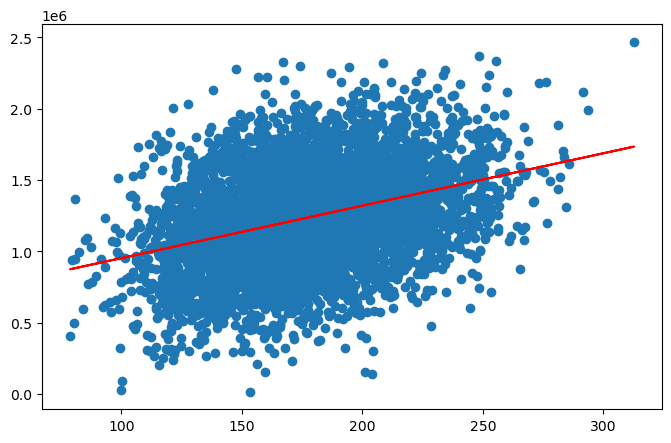

In [43]:
fig6 = plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.plot(x, y_predict_1, 'r')
plt.show()

In [95]:
x_test = [200]
x_test = np.array(x_test).reshape(1, -1)
print(x_test)
y_test_predict = lr1.predict(x_test)
print(y_test_predict)

[[200]]
[1320189.32279261]


In [49]:
# define x_multi
x_multi = data.drop(['Price'], axis = 1)
x_multi.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273545
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659


In [53]:
# set up 2nd linear regression model
lr_multi = LinearRegression();
# train the model
lr_multi.fit(x_multi, y)

LinearRegression()

In [59]:
y_predict_multi = lr_multi.predict(x_multi);
print(y_predict_multi)

[1223968.89166085 1497306.33188629 1250884.31019438 ... 1020693.92390376
 1260503.36914586 1302737.7915763 ]


In [111]:
mse_multi = mean_squared_error(y, y_predict_multi)
r2_score_multi = r2_score(y, y_predict_multi)
print(mse_multi, r2_score_multi)

10219846512.177862 0.9180229195220739


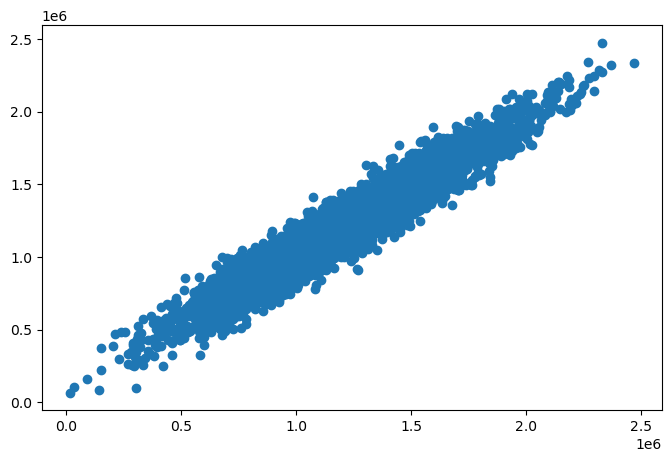

In [69]:
fig7 = plt.figure(figsize=(8,5))
plt.scatter(y, y_predict_multi)
plt.show()

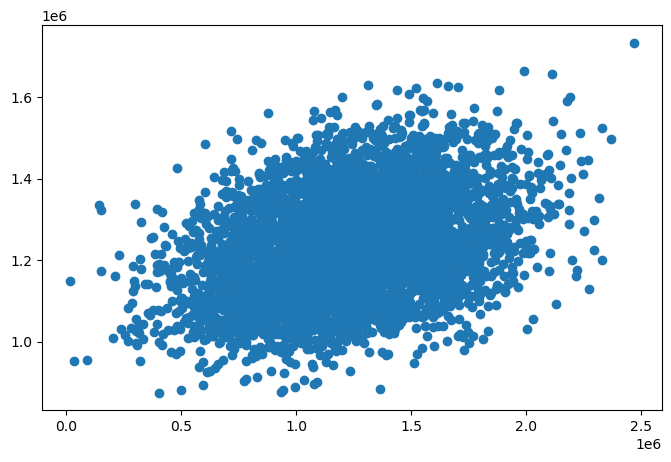

In [65]:
fig8 = plt.figure(figsize=(8,5))
plt.scatter(y, y_predict_1)
plt.show()

In [101]:
x_test = [65000, 5, 5, 30000, 200]
x_test = np.array(x_test).reshape(1, -1)
print(x_test)

[[65000     5     5 30000   200]]


In [105]:
y_test_predict = lr_multi.predict(x_test)
print(y_test_predict)

[817052.19516298]


C:\Users\WindW\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
